In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
data = pd.read_csv('hotel-booking/hotel_booking.csv')
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


## EDA of dataset

In [3]:
## remove unwanted columns:
data = data.drop(columns = ['name', 'email', 'phone-number', 'credit_card'], axis=1)
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
## change datatype of reservation_status_date to datetime
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
data['hotel'].dtype

dtype('O')

In [7]:
## print all unique values in each categorical columns
for col in data.columns:
    if data[col].dtype == 'object':
        print(col)
        print(data[col].unique())
        print('*******************')

hotel
['Resort Hotel' 'City Hotel']
*******************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
*******************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
*******************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB

In [8]:
## check null values
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
## remove null value columns
data = data.drop(columns = ['agent', 'company'], axis=1)

In [10]:
data.dropna(inplace=True)

Now, all null values are removed

In [11]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


### Analysis the outliers in columns

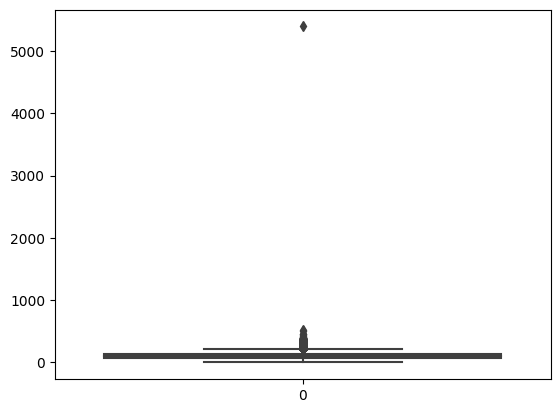

In [12]:
sns.boxplot(data['adr'])
plt.show()

it means, mostly data is present under 1000, and some outlier are also present in this.

In [13]:
data[data['adr']>1000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,A,1,Non Refund,0,Transient,5400.0,0,0,Canceled,2016-02-19


So, we remove this outlier from our calculation

In [14]:
data = data[data['adr']<=1000]

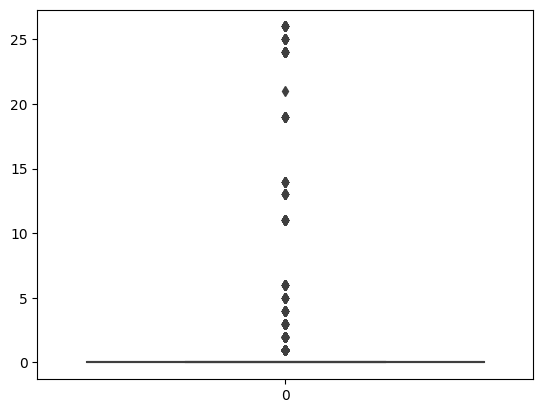

In [15]:
## Analysis this previous_cancellations column
sns.boxplot(data['previous_cancellations'])
plt.show()

Let's make a sample dataframe that have values where previous_cancellations>5

In [16]:
previous_cancellations_gt_5 = data[data['previous_cancellations']>5]

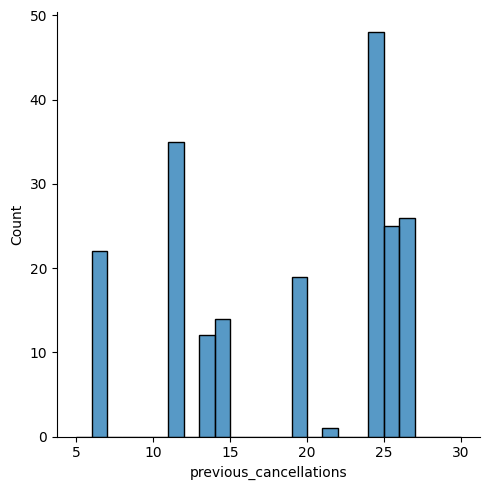

In [17]:
arr = np.linspace(5,30,26)
sns.displot(previous_cancellations_gt_5['previous_cancellations'], bins=arr)
plt.show()

it means, there were around 100 customers, whose previous_cancellations>=24

## Data Analysis and visualizations

### Task: Find % of peoples is_cancelled

In [18]:
data['is_canceled'].value_counts()
## Value indicating if the booking was canceled (1) or not (0).

0    74745
1    44152
Name: is_canceled, dtype: int64

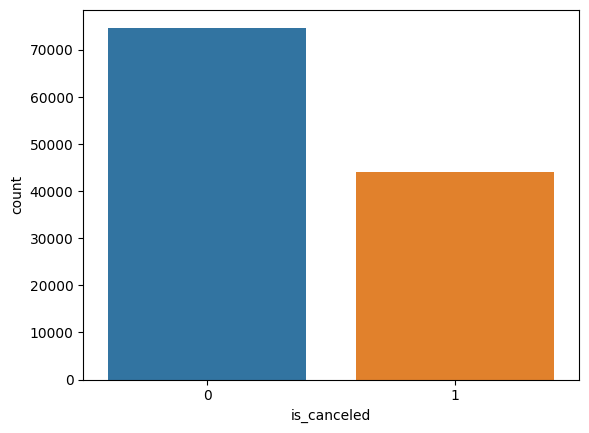

% of peoples cancelled the booking: 37.134662775343365
% of peoples not cancelled the booking: 62.865337224656635


In [19]:
sns.countplot(x = 'is_canceled', data=data)
plt.show()
print('% of peoples cancelled the booking: {}'.format(100 * data['is_canceled'].value_counts().values[1] / len(data)))
print('% of peoples not cancelled the booking: {}'.format(100 * data['is_canceled'].value_counts().values[0] / len(data)))

### Task: Depend on hotel, find % of cancelled

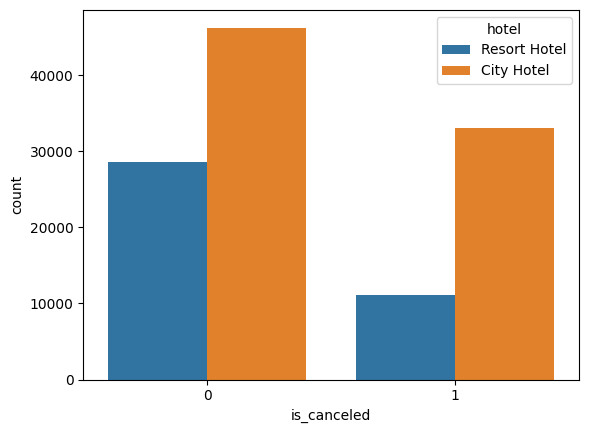

In [20]:
sns.countplot(x = 'is_canceled', data=data, hue='hotel')
plt.show()

it means, more cancellations were done in city hotel than resort hotel

### Task: Find ADR for each hotel

In [21]:
resort_hotel = data[data['hotel'] == 'Resort Hotel']
city_hotel = data[data['hotel'] == 'City Hotel']

In [22]:
resort_hotel_avg = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_avg = city_hotel.groupby('reservation_status_date')[['adr']].mean()

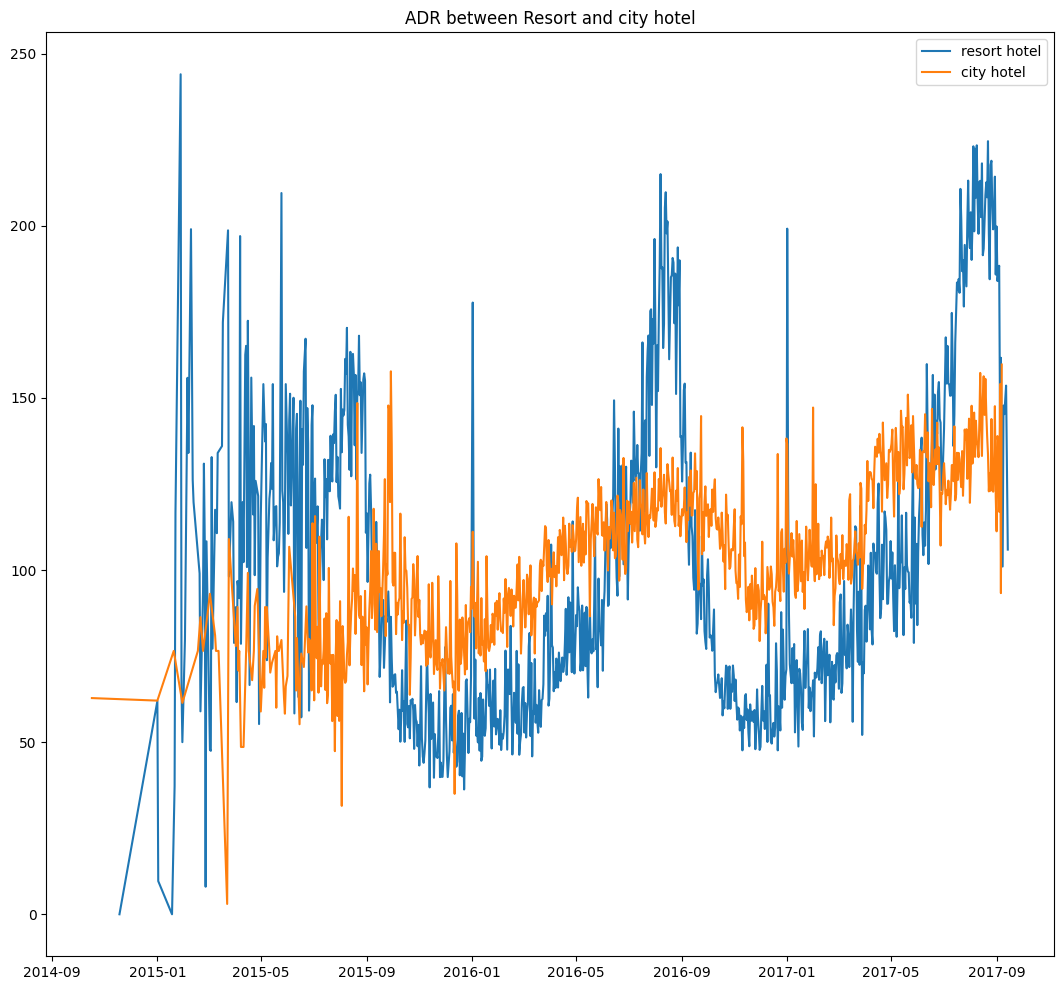

In [23]:
plt.figure(figsize=(13,12))
plt.plot(resort_hotel_avg.index, resort_hotel_avg['adr'], label = 'resort hotel')
plt.plot(city_hotel_avg.index, city_hotel_avg['adr'],  label = 'city hotel')
plt.title('ADR between Resort and city hotel')
plt.legend()
plt.show()

it means, generally average price for resort hotel is high than city hotel

### Task: Reservation status per month

In [24]:
data['month'] = data['reservation_status_date'].dt.month

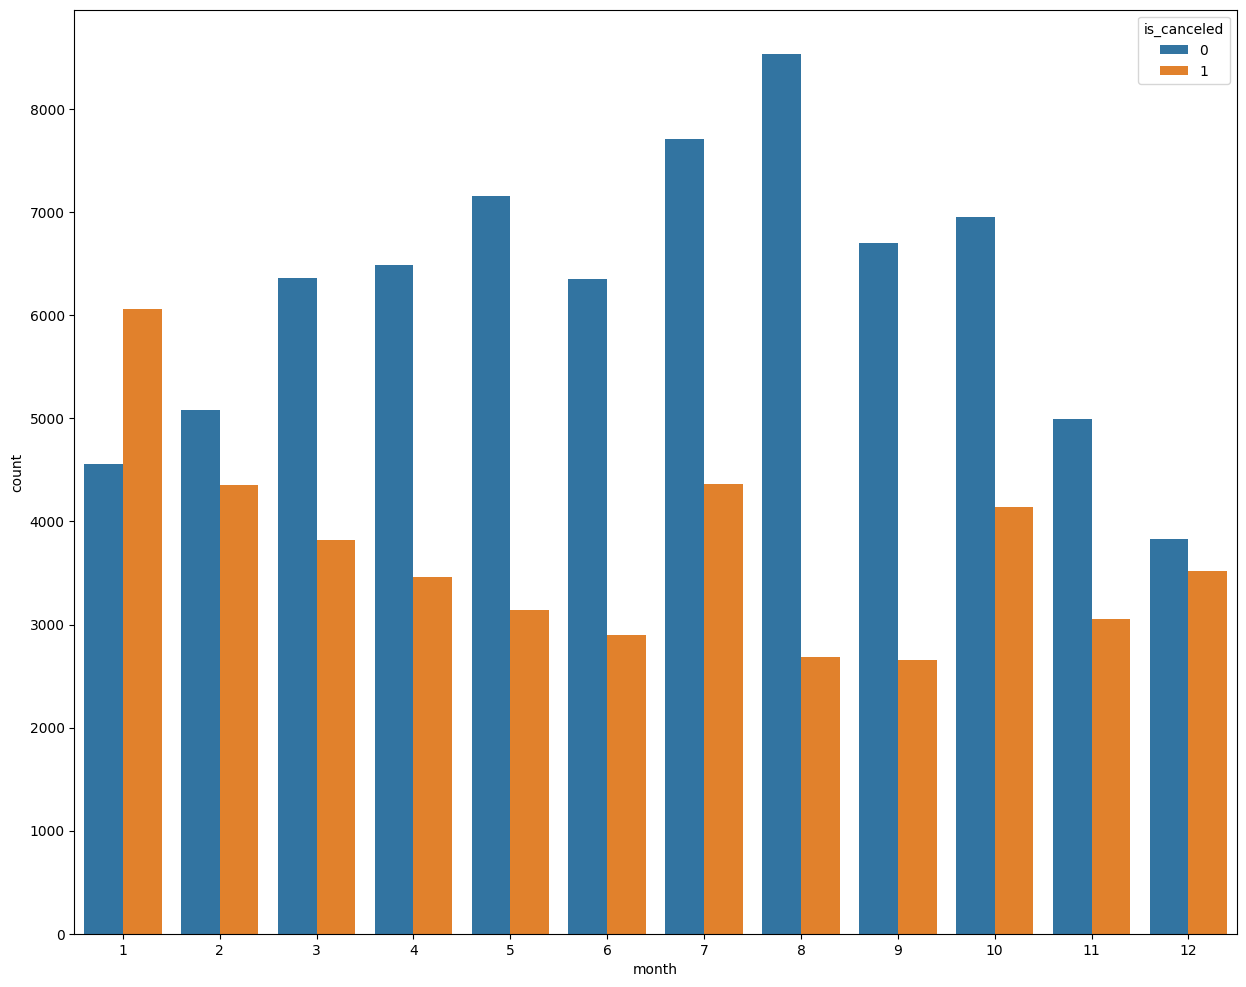

In [25]:
plt.figure(figsize = (15,12))
sns.countplot(x = 'month', hue='is_canceled', data=data)
plt.show()

it means, most orders are canceled in January.

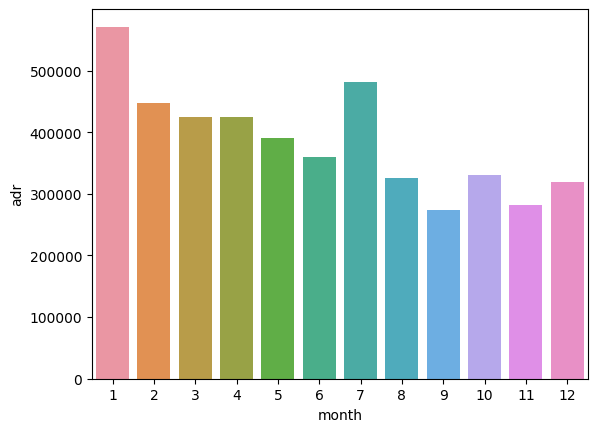

In [26]:
## now plot for ADR vs month
sns.barplot(x = 'month', y='adr', data=data[data['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

it means, ADR is highest in January and cancellations are also higher in moth january.

### Task: Find cancelations in top 10 countries

PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
       ...  
UMI        1
HND        1
FJI        1
SYC        1
CRI        1
Name: country, Length: 127, dtype: int64


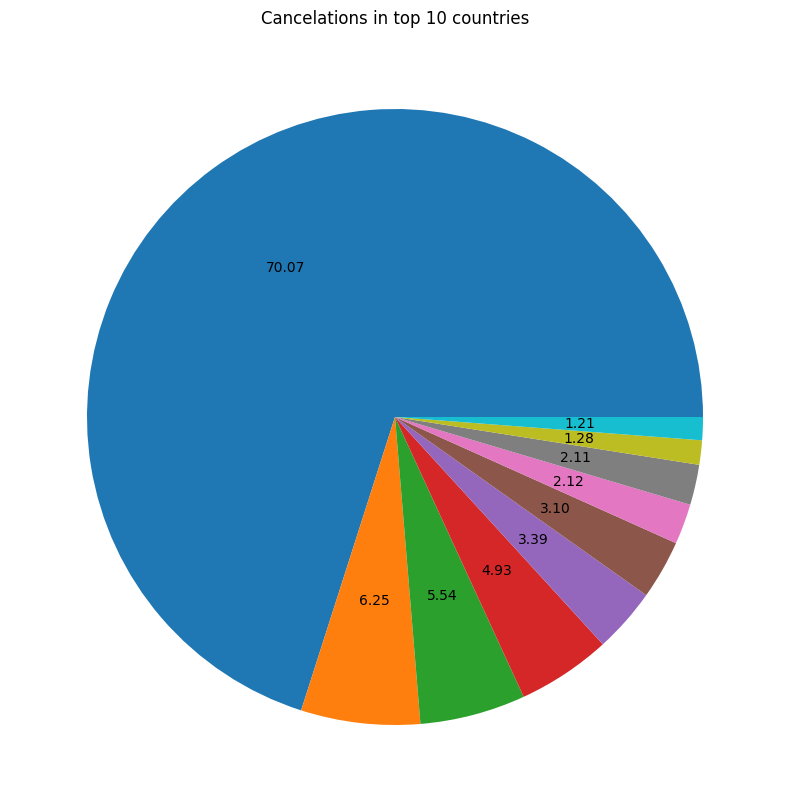

In [27]:
data_cancel = data[data['is_canceled'] == 1]
print(data_cancel['country'].value_counts())
top_10_country_cancel = data_cancel['country'].value_counts()[:10]
plt.figure(figsize = (10,10))
plt.pie(top_10_country_cancel, autopct = '%.2f')
plt.title('Cancelations in top 10 countries')
plt.show()

it means, country PRT has highest cancelations i.e., 70.07%

### Task: Analyze the market_segment column

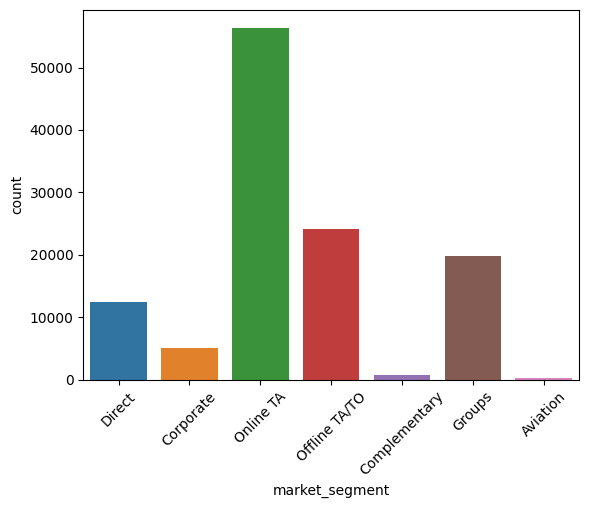

In [28]:
sns.countplot(x = 'market_segment', data=data)
plt.xticks(rotation = 45)
plt.show()

it means, most hotel bookings are came from Online Travel Agent

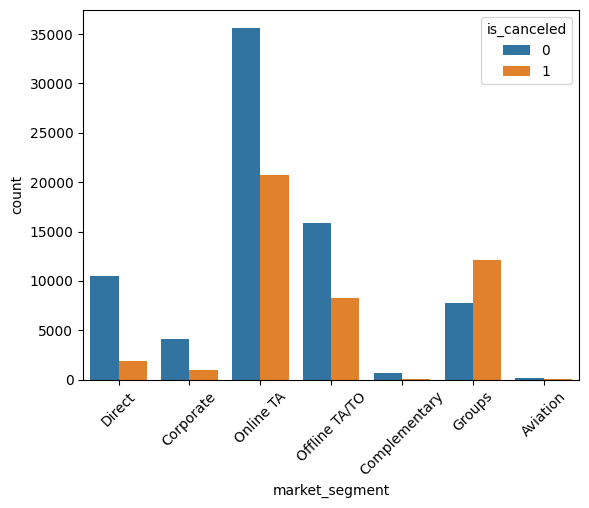

In [29]:
## now check for canceled and not_canceled orders
sns.countplot(x = 'market_segment', data=data, hue='is_canceled')
plt.xticks(rotation = 45)
plt.show()

it means, booking by "Gropus" market_segment have higher canceled bookings than non_canceled bookings

### Task: check ADR is major factor for canceling hotels?

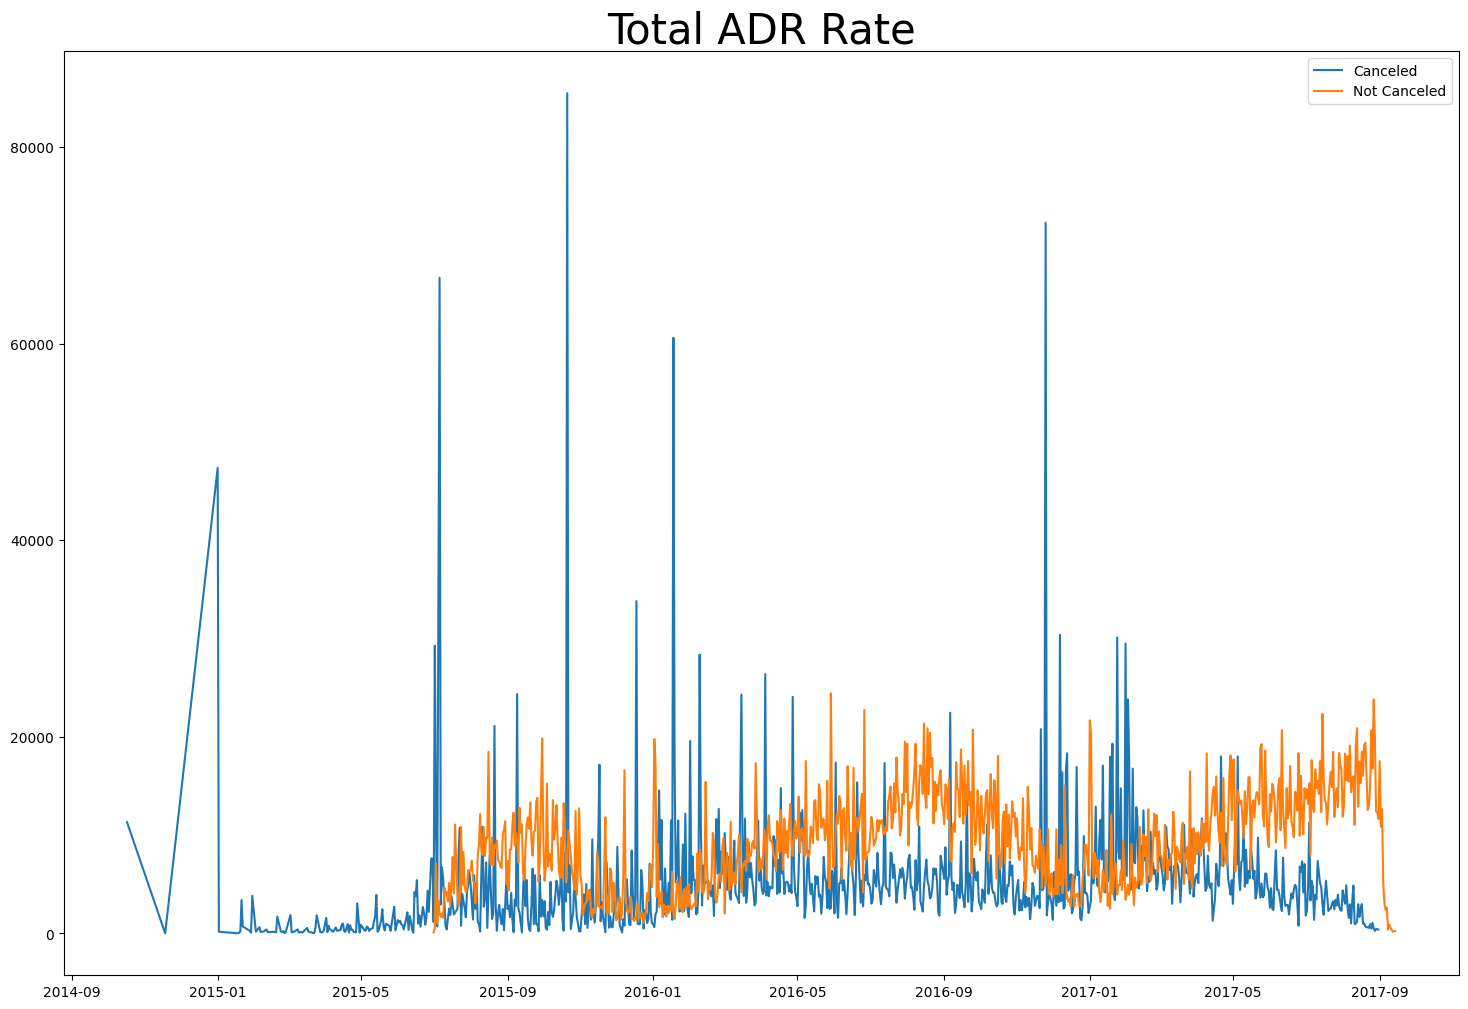

In [30]:
data_canceled = data[data['is_canceled'] == 1]
data_canceled_adr = data_canceled.groupby('reservation_status_date')[['adr']].sum()
data_canceled_adr.reset_index(inplace=True)
data_canceled_adr.sort_values('reservation_status_date', inplace=True)

data_not_canceled = data[data['is_canceled'] == 0]
data_not_canceled_adr = data_not_canceled.groupby('reservation_status_date')[['adr']].sum()
data_not_canceled_adr.reset_index(inplace=True)
data_not_canceled_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize = (18,12))
plt.plot(data_canceled_adr['reservation_status_date'],data_canceled_adr['adr'],label='Canceled')
plt.plot(data_not_canceled_adr['reservation_status_date'],data_not_canceled_adr['adr'],label='Not Canceled')
plt.title('Total ADR Rate', fontsize=30)
plt.legend()
plt.show()

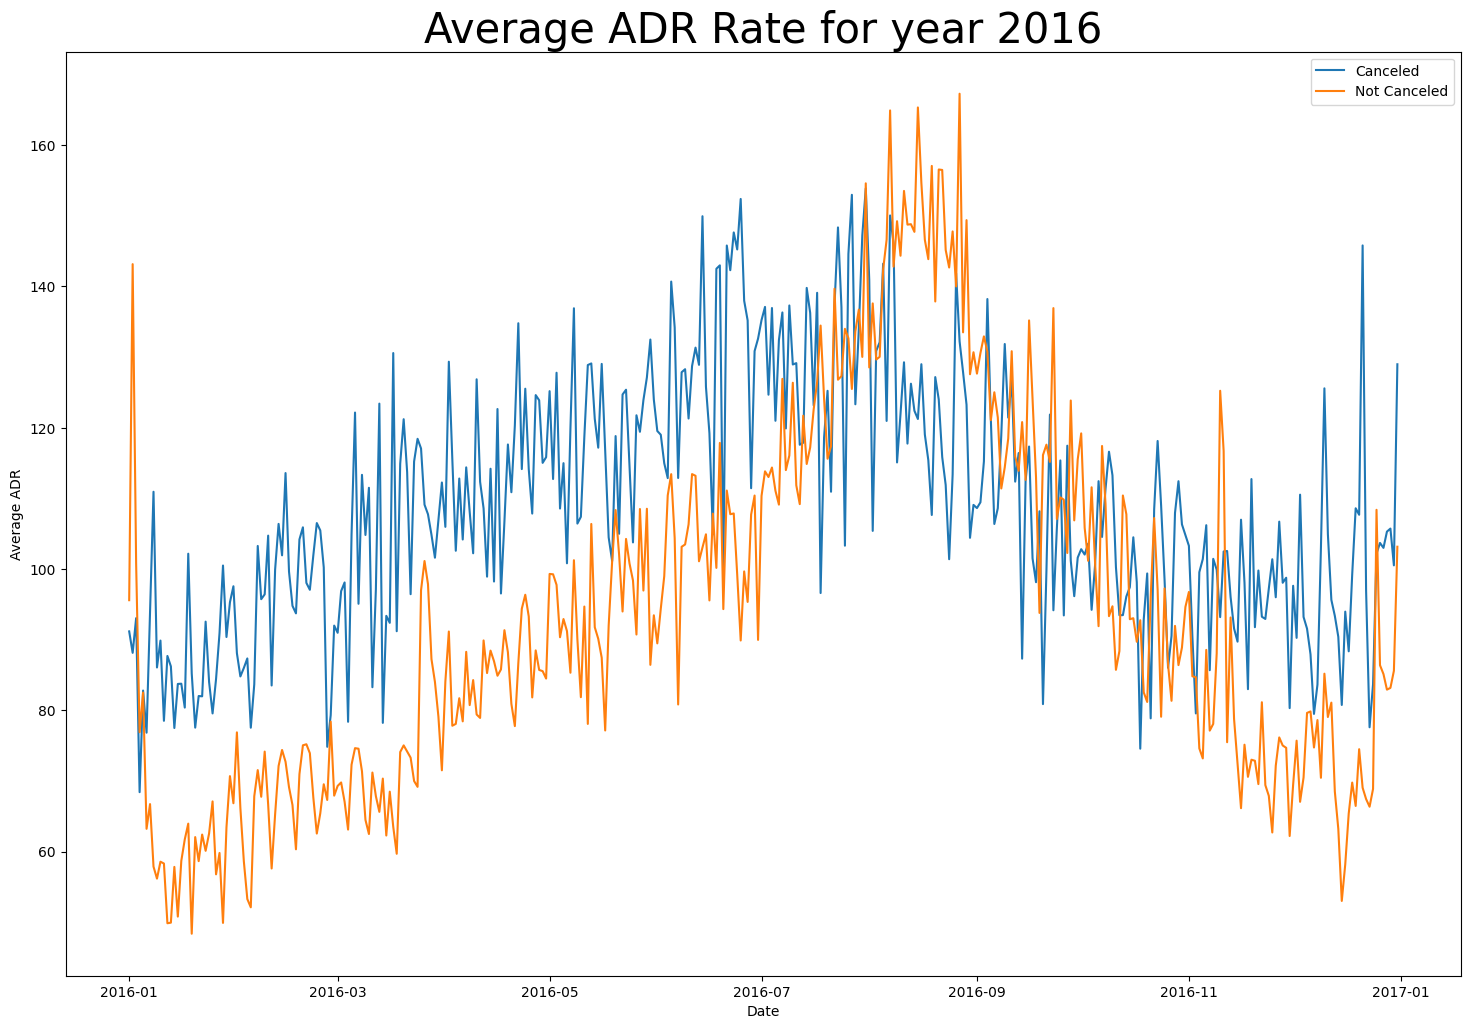

In [31]:
## plot the graph start from year 2016
data_canceled = data[(data['is_canceled'] == 1) & (data['reservation_status_date'].dt.year>=2016) & (data['reservation_status_date'].dt.year<2017)]
data_canceled_adr = data_canceled.groupby('reservation_status_date')[['adr']].mean()
data_canceled_adr.reset_index(inplace=True)
data_canceled_adr.sort_values('reservation_status_date', inplace=True)

data_not_canceled = data[(data['is_canceled'] == 0) & (data['reservation_status_date'].dt.year>=2016) & (data['reservation_status_date'].dt.year<2017)]
data_not_canceled_adr = data_not_canceled.groupby('reservation_status_date')[['adr']].mean()
data_not_canceled_adr.reset_index(inplace=True)
data_not_canceled_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize = (18,12))
plt.plot(data_canceled_adr['reservation_status_date'],data_canceled_adr['adr'],label='Canceled')
plt.plot(data_not_canceled_adr['reservation_status_date'],data_not_canceled_adr['adr'],label='Not Canceled')
plt.title('Average ADR Rate for year 2016', fontsize=30)
plt.xlabel('Date')
plt.ylabel('Average ADR')
plt.legend()
plt.show()

it means, order are more canceled in year 2016 till July.

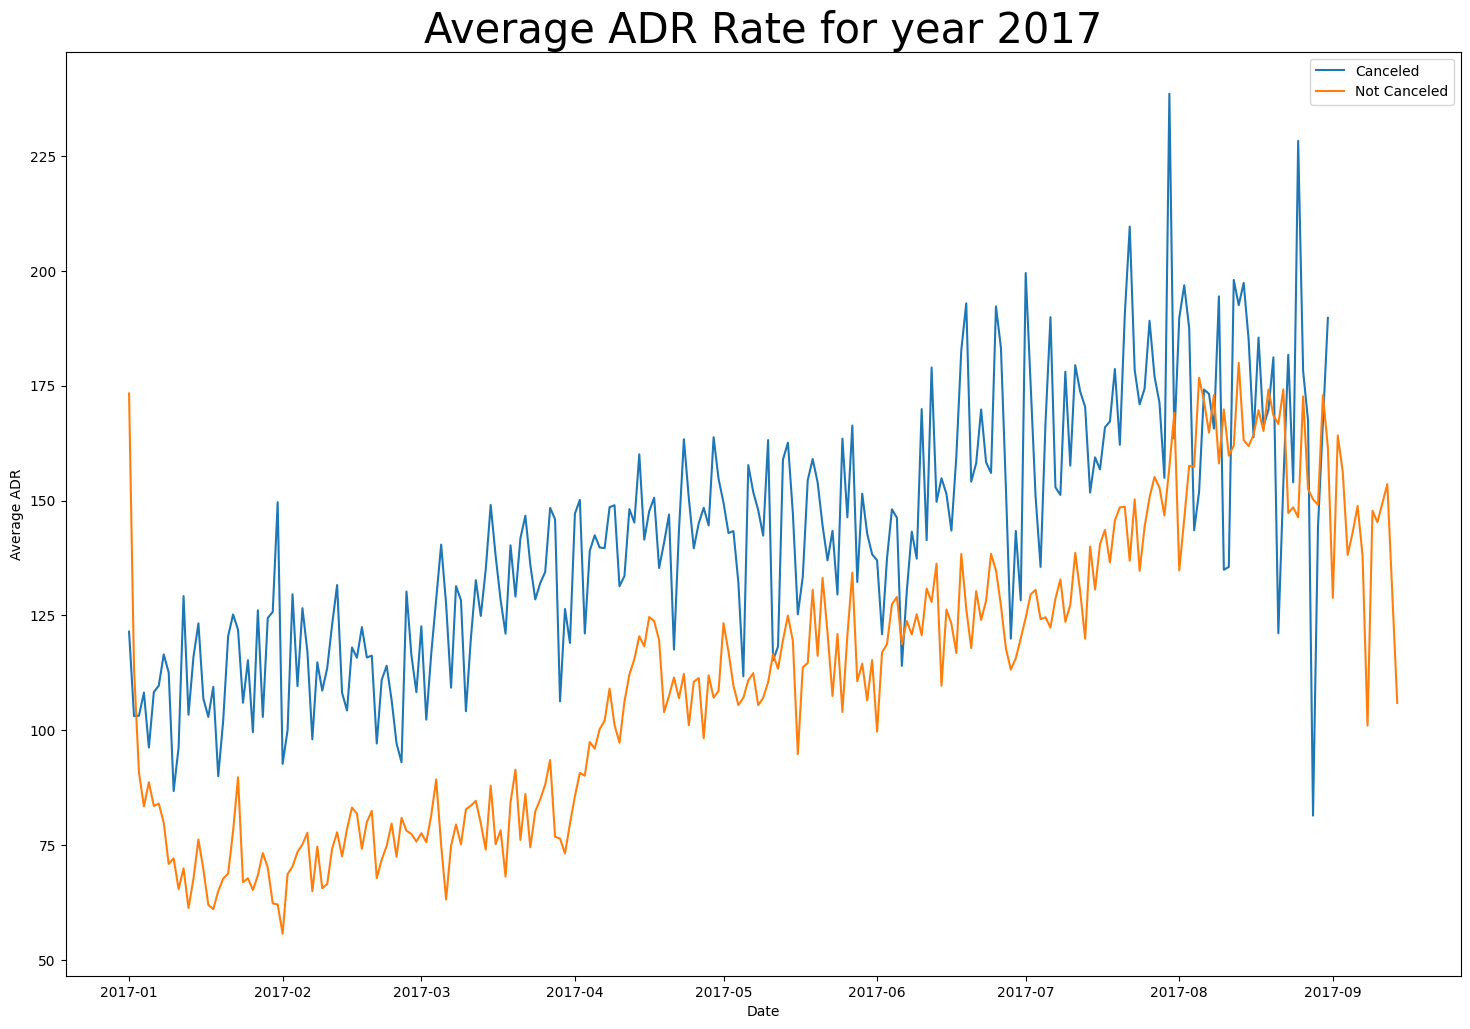

In [32]:
## plot the graph start from year 2017
data_canceled = data[(data['is_canceled'] == 1) & (data['reservation_status_date'].dt.year>=2017)]
data_canceled_adr = data_canceled.groupby('reservation_status_date')[['adr']].mean()
data_canceled_adr.reset_index(inplace=True)
data_canceled_adr.sort_values('reservation_status_date', inplace=True)

data_not_canceled = data[(data['is_canceled'] == 0) & (data['reservation_status_date'].dt.year>=2017)]
data_not_canceled_adr = data_not_canceled.groupby('reservation_status_date')[['adr']].mean()
data_not_canceled_adr.reset_index(inplace=True)
data_not_canceled_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize = (18,12))
plt.plot(data_canceled_adr['reservation_status_date'],data_canceled_adr['adr'],label='Canceled')
plt.plot(data_not_canceled_adr['reservation_status_date'],data_not_canceled_adr['adr'],label='Not Canceled')
plt.title('Average ADR Rate for year 2017', fontsize=30)
plt.xlabel('Date')
plt.ylabel('Average ADR')
plt.legend()
plt.show()

it means, hotels are more canceled in 2017, if price is increasing